In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())


PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


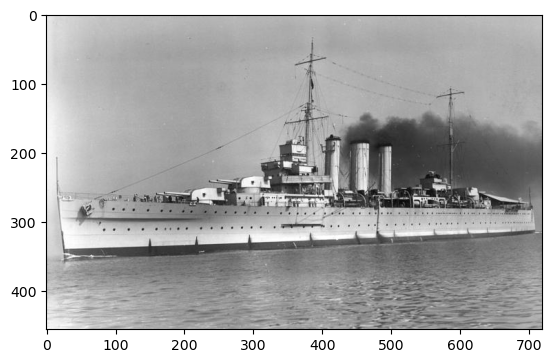

In [2]:
pil_image = Image.open("../data/processed-royalnavy-three-sets/portraits__DUPLICATE_HMS_Australia_Battlecruiser_1911.jpg.jpg")
image = np.array(pil_image)

plt.imshow(image)

In [3]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "c:/users/seppe/downloads/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [4]:
predictor.set_image(image)

In [5]:
image.shape

(456, 720, 3)

In [21]:
input_point = np.array([[image.shape[1] // 4, 0]]) # x, y vs numpy y, x
input_label = np.array([1])

In [22]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

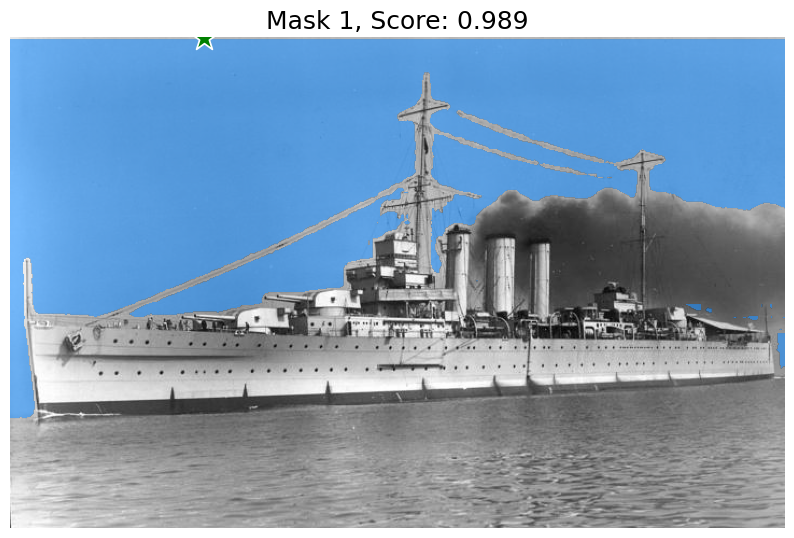

In [23]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [26]:
mask.shape

(456, 720)

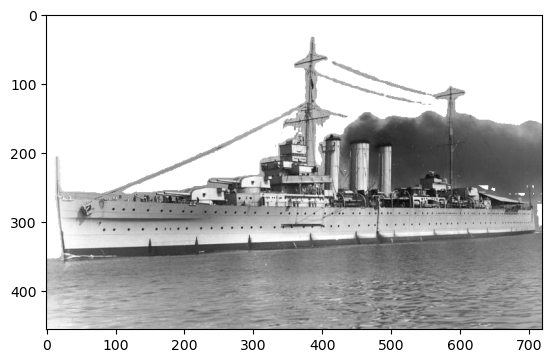

In [27]:
image_masked = image
image_masked[mask] = (255,255,255)
plt.imshow(image_masked)